<a href="https://colab.research.google.com/github/Aryan-Gupta2002/Image-Processing/blob/main/gnDenoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##In this notebook, MNIST images are used as dataset to perform denoising while image processing  
* Gaussian Noise (Normally distributed) is added to the images.
* Original and noised images are visually plotted  
* Denoising is done mathematically with the help of Non-Local Means denoising Algorithm  
* PSNR and SSIM are calculated as loss metrics

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

#For Single Image
---

Loading Dataset ->

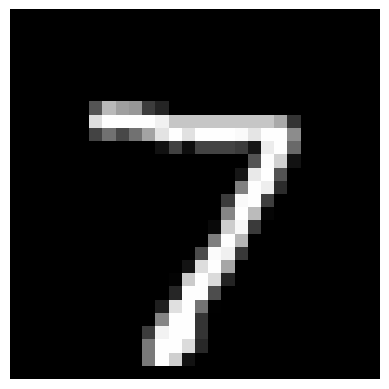

<Figure size 500x500 with 0 Axes>

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
image = x_test[0]
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.figure(figsize=(5,5))
plt.show()


In [ ]:
# Normalizing Pixel values
image = image / 255.0

Adding Noise ->

In [ ]:
mean = 0
sigma = 0.1
noise = np.random.normal(mean, sigma, image.shape)
noisy_image = image + noise
noisy_image = np.clip(noisy_image, 0, 1)

Plotting the original and noisy images ->

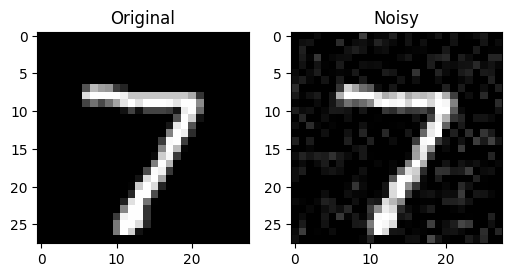

In [ ]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1,2,2)
plt.title("Noisy")
plt.imshow(noisy_image, cmap='gray')

plt.show()

Denoising Images ->

In [ ]:
noisy_8bit = (noisy_image * 255).astype('uint8')
denoised = cv2.fastNlMeansDenoising(noisy_8bit,
                                    None,
                                    h=15,
                                    templateWindowSize=7,
                                    searchWindowSize=21)
denoised = denoised / 255.0

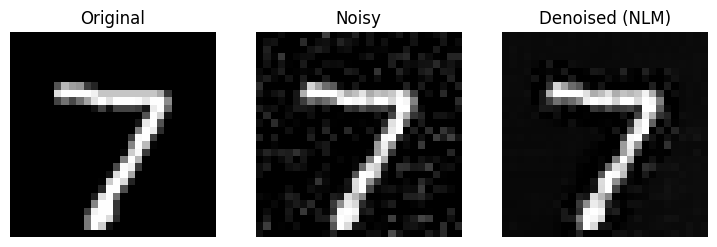

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Noisy")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Denoised (NLM)")
plt.imshow(denoised, cmap='gray')
plt.axis('off')

plt.show()


Calculating results ->

In [ ]:
mse = np.mean((image - denoised) ** 2)

psnr = 20 * math.log10(1.0 / math.sqrt(mse))

print("PSNR:", psnr)

PSNR: 25.554354525935334


#For Whole Dataset
---

In [ ]:
#Loading dataset
(x_trainS, _), (x_testS, _) = tf.keras.datasets.mnist.load_data()

#Normalizing pixel intensities
x_trainS = x_trainS.astype("float32") / 255.0
x_testS  = x_testS.astype("float32") / 255.0

#adding channels
x_trainS = x_trainS[..., tf.newaxis]
x_testS  = x_testS[..., tf.newaxis]
x_trainS.shape,x_testS.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# Adding Gaussian Noise
sigma = 0.3

noise_train = np.random.normal(0, sigma, x_trainS.shape)
noise_test  = np.random.normal(0, sigma, x_testS.shape)

x_trainS_noisy = x_trainS + noise_train
x_testS_noisy  = x_testS + noise_test

#Clipping values [0,1]
x_trainS_noisy = np.clip(x_trainS_noisy, 0.0, 1.0)
x_testS_noisy  = np.clip(x_testS_noisy, 0.0, 1.0)


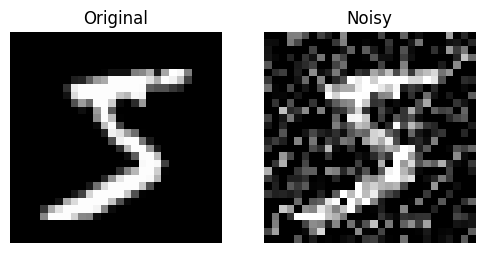

In [ ]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(x_trainS[0], cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Noisy")
plt.imshow(x_trainS_noisy[0], cmap='gray')
plt.axis('off')

plt.show()


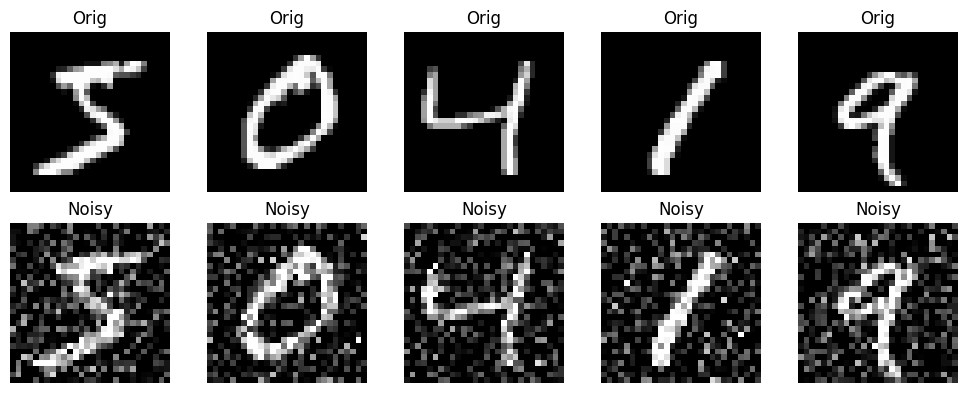

In [ ]:
plt.figure(figsize=(10,4))

for i in range(5):

    # Original images (top row)
    plt.subplot(2, 5, i+1)
    plt.imshow(x_trainS[i], cmap='gray')
    plt.title("Orig")
    plt.axis('off')

    # Noisy images (bottom row)
    plt.subplot(2, 5, i+6)
    plt.imshow(x_trainS_noisy[i], cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

plt.tight_layout()
plt.show()


###Filtering Process Starts Here
----

In [ ]:
# Denoising our images
from skimage.restoration import denoise_nl_means, estimate_sigma
sigma_est = sigma
print(sigma_est)


0.3


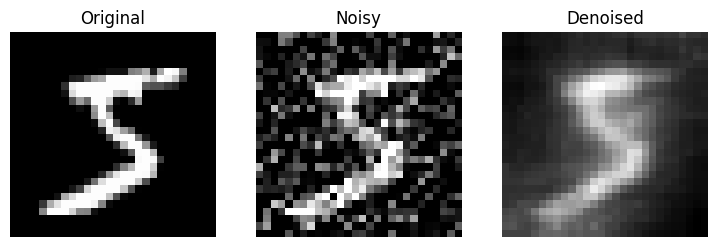

In [ ]:
# For One Image
denoised_sample = denoise_nl_means(
    x_trainS_noisy[0],
    h=1.15 * sigma_est,
    patch_size=5,
    patch_distance=6,
    fast_mode=True
)

# Plotting Single result
plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(x_trainS[0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Noisy")
plt.imshow(x_trainS_noisy[0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Denoised")
plt.imshow(denoised_sample, cmap='gray')
plt.axis('off')

plt.show()

Creating a subset of the whole dataset for denoising  
(Non-Local Means is generally slower)

In [ ]:
x_trainS_noisy_2d = x_trainS_noisy.squeeze()
x_trainS_denoised = np.zeros_like(x_trainS_noisy_2d)
subset_size = 1000

noisy_subset = x_trainS_noisy_2d[:subset_size]
clean_subset = x_trainS[:subset_size]
clean_subset = clean_subset.squeeze()
noisy_subset= noisy_subset.squeeze()

denoised_subset = np.zeros_like(noisy_subset)

for i in range(subset_size):
    denoised_subset[i] = denoise_nl_means(
        noisy_subset[i],
        h=0.9 * sigma_est,
        patch_size=7,
        patch_distance=11,
        fast_mode=False
    )


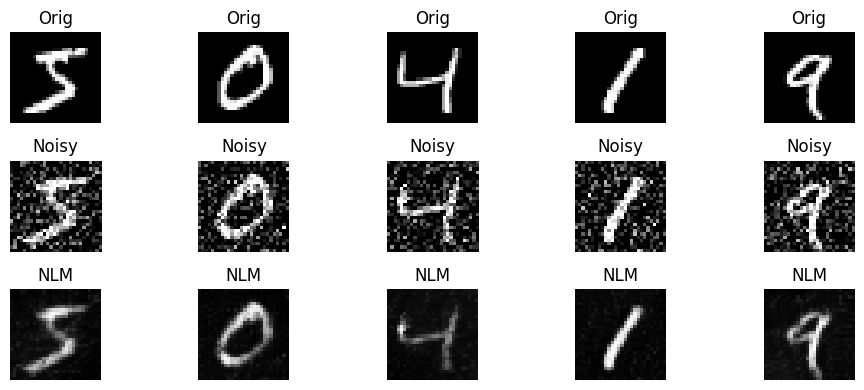

In [ ]:
plt.figure(figsize=(10,4))

for i in range(5):
    plt.subplot(3,5,i+1)
    plt.imshow(clean_subset[i], cmap='gray')
    plt.axis('off')
    plt.title("Orig")

    plt.subplot(3,5,i+6)
    plt.imshow(noisy_subset[i], cmap='gray')
    plt.axis('off')
    plt.title("Noisy")

    plt.subplot(3,5,i+11)
    plt.imshow(denoised_subset[i], cmap='gray')
    plt.axis('off')
    plt.title("NLM")

plt.tight_layout()
plt.show()


### Calculating and Comparing PSNR and SSIM (Noisy and Denoised Image)

In [ ]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
psnr_value = peak_signal_noise_ratio(x_trainS[0].squeeze(), denoised_subset[0])
ssim_value = structural_similarity(x_trainS[0].squeeze(), denoised_subset[0], data_range=1.0)
psnr_vals = []
ssim_vals = []
clean_subset = clean_subset.squeeze().astype('float32')
denoised_subset = denoised_subset.astype('float32')
noisy_subset = noisy_subset.astype('float32')
for i in range(subset_size):
    psnr_vals.append(
        peak_signal_noise_ratio(clean_subset[i], denoised_subset[i])
    )

    ssim_vals.append(
        structural_similarity(clean_subset[i], denoised_subset[i], data_range=1.0)
    )
print("Average PSNR:", np.mean(psnr_vals))
print("Average SSIM:", np.mean(ssim_vals))


/tmp/ipython-input-3761121138.py:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_value = peak_signal_noise_ratio(x_trainS[0].squeeze(), denoised_subset[0])


Average PSNR: 15.618953444976963
Average SSIM: 0.49564561316125966


In [ ]:
psnr_noisy = []
ssim_noisy = []

for i in range(subset_size):
    psnr_noisy.append(
        peak_signal_noise_ratio(clean_subset[i], noisy_subset[i])
    )

    ssim_noisy.append(
        structural_similarity(clean_subset[i], noisy_subset[i], data_range=1.0)
    )

print("Noisy PSNR:", np.mean(psnr_noisy))
print("Denoised PSNR:", np.mean(psnr_vals))

print("Noisy SSIM:", np.mean(ssim_noisy))
print("Denoised SSIM:", np.mean(ssim_vals))


Noisy PSNR: 13.325672151982074
Denoised PSNR: 15.618953444976963
Noisy SSIM: 0.5219433775597268
Denoised SSIM: 0.49564561316125966
